# Auto Arima

Auto ARIMA (AutoRegressive Integrated Moving Average) is a statistical method used for time series forecasting. It automatically identifies the best-fitting ARIMA model for a given time series dataset by evaluating different combinations of parameters.

**The algorithm**

Skforecast implements a native version of of Rob J. Hyndman's ARIMA routine with two key extensions: support for a drift term and optional Box-Cox transformation.

The algorithm follows these steps:

1. **Initial Setup**: Define the range of parameters (p, d, q) to be tested, where:
   - p: number of autoregressive terms
   - d: number of non-seasonal differences needed for stationarity
   - q: number of lagged forecast errors in the prediction equation
   - (P, D, Q, m): seasonal counterparts of (p, d, q) and the seasonal period


COMPLETAR!!!!!!!!!!!!!!!!!!!!

## Libraries and data

In [2]:
# Libraries
# ==============================================================================
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from skforecast.datasets import fetch_dataset
from skforecast.stats import Arima
from skforecast.recursive import ForecasterStats
from skforecast.model_selection import TimeSeriesFold, backtesting_stats
from skforecast.plot import set_dark_theme
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Download data
# ==============================================================================
data = fetch_dataset(name="fuel_consumption")
data.head(3)

╭──────────────────────────────── fuel_consumption ────────────────────────────────╮
│ Description:                                                                     │
│ Monthly fuel consumption in Spain from 1969-01-01 to 2022-08-01.                 │
│                                                                                  │
│ Source:                                                                          │
│ Obtained from Corporación de Reservas Estratégicas de Productos Petrolíferos and │
│ Corporación de Derecho Público tutelada por el Ministerio para la Transición     │
│ Ecológica y el Reto Demográfico. https://www.cores.es/es/estadisticas            │
│                                                                                  │
│ URL:                                                                             │
│ https://raw.githubusercontent.com/skforecast/skforecast-                         │
│ datasets/main/data/consumos-combustibles-mensual.csv                             │
│                                                                                  │
│ Shape: 644 rows x 5 columns                                                      │
╰──────────────────────────────────────────────────────────────────────────────────╯

,GLPs,Gasolinas,Querosenos,Gasoleos,Fueloleos
Fecha,,,,,
1969-01-01,133615.0962,166875.2129,123257.8090,401185.2939,912583.4202
1969-02-01,126748.4741,155466.8105,114682.5767,385360.0381,851877.8115
1969-03-01,107795.8091,184983.6699,109970.0796,418955.5808,873884.2933


Train dates : 1992-04-01 00:00:00 --- 2005-06-01 00:00:00  (n=159)
Test dates  : 2005-07-01 00:00:00 --- 2008-06-01 00:00:00  (n=36)


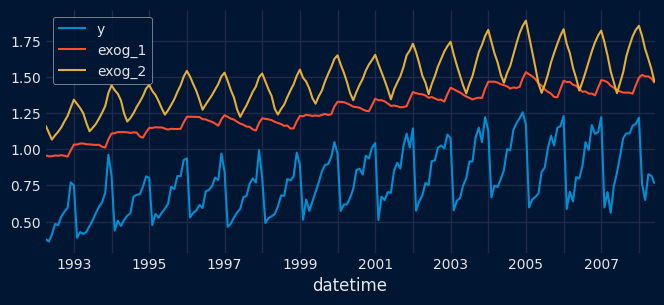

In [39]:
# Train-test dates
# ==============================================================================
end_train = '2005-06-01 23:59:59'
print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})"
)
print(
    f"Test dates  : {data.loc[end_train:].index.min()} --- {data.loc[:].index.max()}  "
    f"(n={len(data.loc[end_train:])})"
)
data_train = data.loc[:end_train]
data_test  = data.loc[end_train:]

# Plot
# ==============================================================================
set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
data.plot(ax=ax)
ax.legend();